In [3]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [21]:
df_megaset = pd.read_csv('../../data/megaset.csv')
df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010.0,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1 cheerleader camp,2010.0,NaN,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#horror,2015.0,NaN,NaN,NaN,NaN,1500000.0,NaN,NaN,NaN,NaN,NaN
4,$,1971.0,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85115,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85116,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85117,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
85118,₤500 reward,1918.0,"silent film, english",NaN,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Genre Preference

Preferences in genre in US vs World for american movies (rank genres based on foreign revenues vs domestic revenues)

# Trope Preference

Preferences in TV tropes in US vs World for american movies (rank tropes based on foreign revenues vs domestic revenues)

# Proportion of Domestic vs Foreign gross for US movies

domestic vs foreign income, total and percentage, for american movies over time

In [43]:
year_min = df_megaset['Year'].min()
year_max = df_megaset['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 1888.0 to 2020.0


In [22]:
df_gross = df_megaset.drop(columns=['Budget', 'Languages', 'Genres', 'Tropes'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
26,(500) days of summer,2009.0,united states of america,32425665.0,0.941537,2013395.0,0.058463,34439060.0
94,10 things i hate about you,1999.0,united states of america,38177966.0,0.631940,22235984.0,0.368060,60413950.0
152,10th & wolf,2006.0,united states of america,54702.0,0.380451,89080.0,0.619549,143782.0
161,11-11-11,2011.0,"united states of america, spain",32800.0,0.005721,5700000.0,0.994279,5732800.0
174,12 rounds,2009.0,united states of america,12234694.0,0.706936,5071954.0,0.293064,17306648.0
...,...,...,...,...,...,...,...,...
84873,zodiac,2007.0,united states of america,33080084.0,0.398171,50000000.0,0.601829,83080084.0
84920,zombieland,2009.0,united states of america,75590286.0,0.739366,26646310.0,0.260634,102236596.0
84940,zookeeper,2011.0,united states of america,80360866.0,0.470482,90444659.0,0.529518,170805525.0
84941,zoolander,2001.0,"united states of america, australia, germany",45172250.0,0.743197,15608731.0,0.256803,60780981.0


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

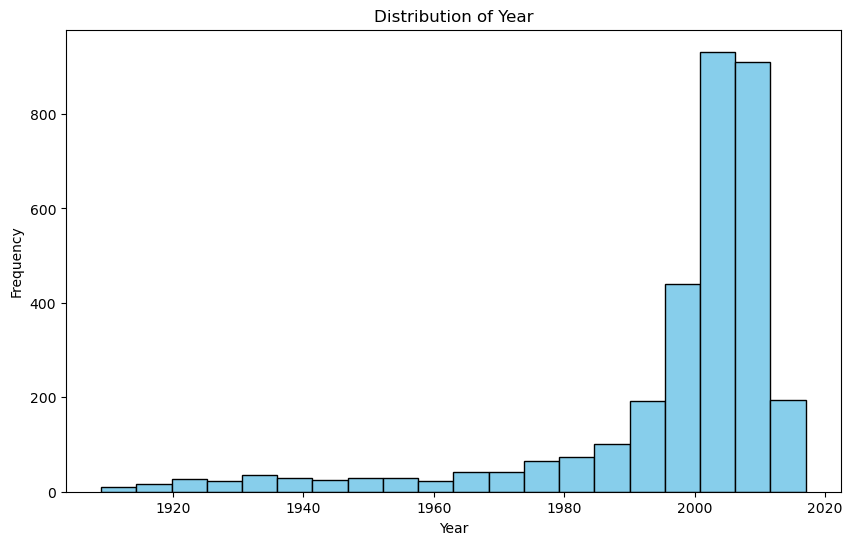

In [32]:
# Plot the histogram for the 'Year' column
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

In [42]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 1980.0 to 2017.0


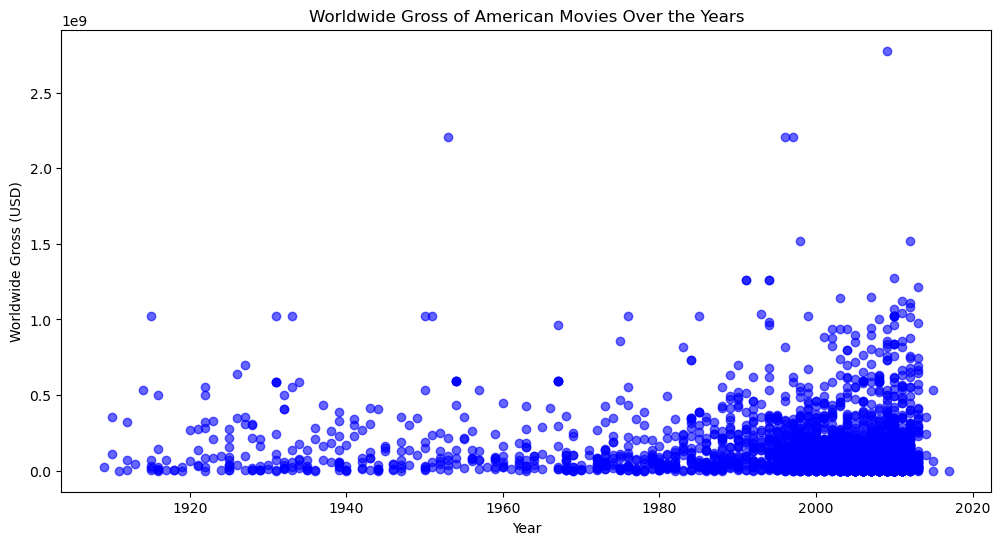

In [24]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

# Show the plot
plt.show()

In [52]:
## FILTER FOR years above 1980
df_gross = df_gross[(df_gross['Year'] > 1999)&(df_gross['Year'] < 2017)]

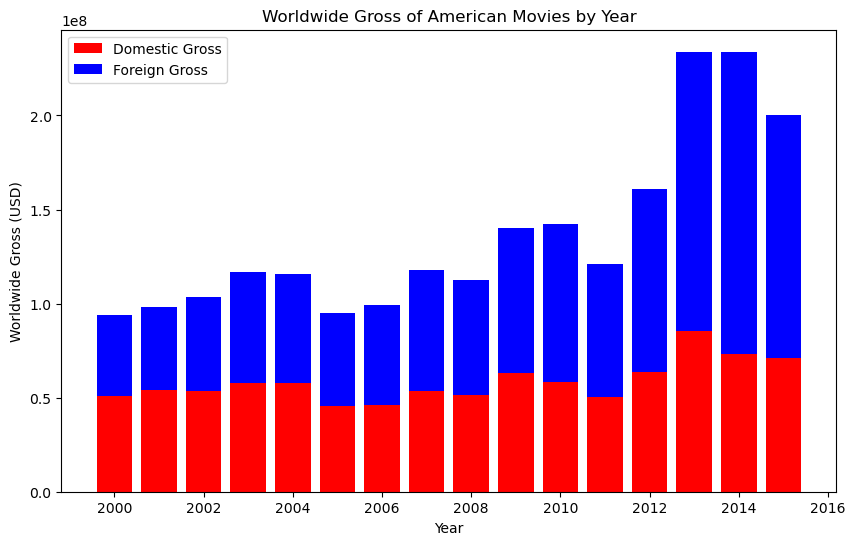

In [53]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_gross.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

# Display the plot
plt.show()

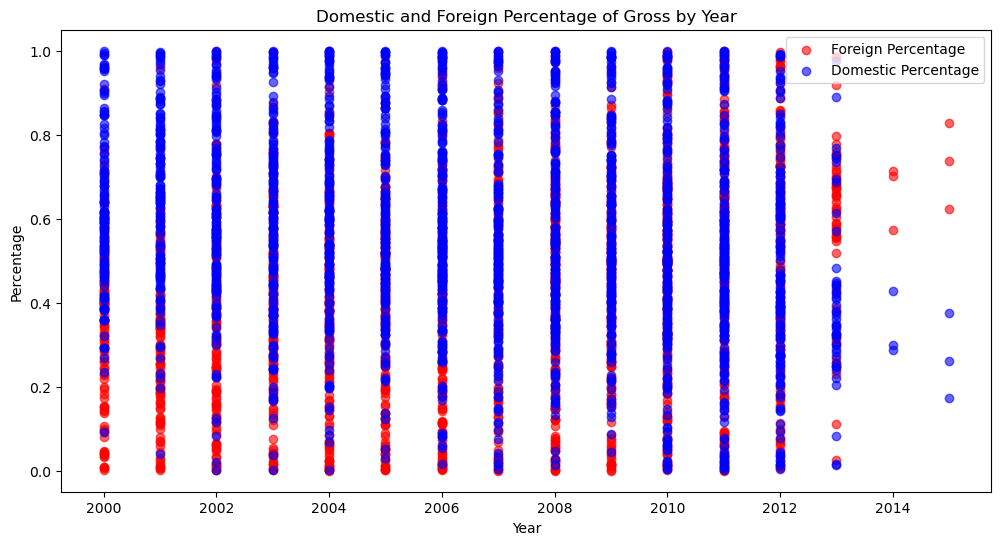

In [54]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_gross['Year'], df_gross['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_gross['Year'], df_gross['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

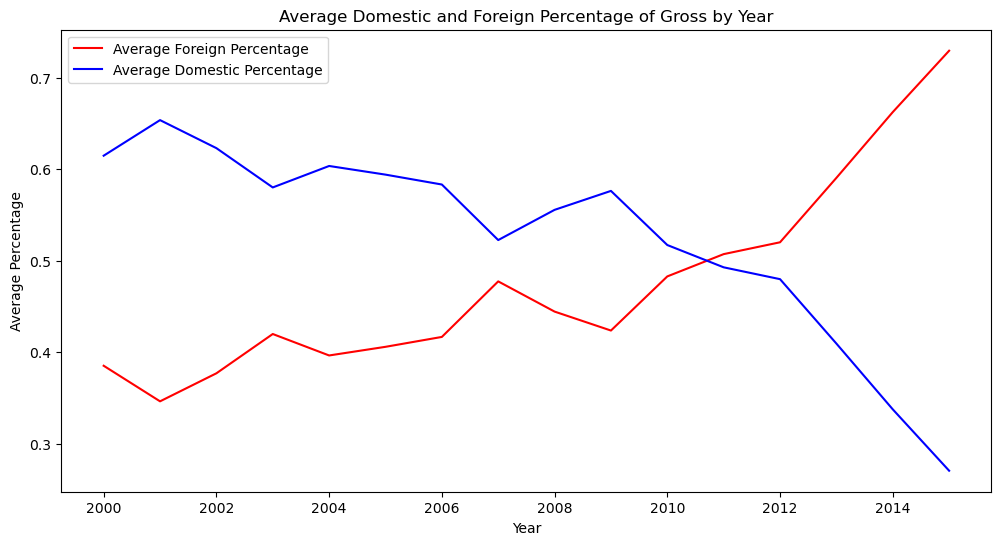

In [55]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_gross.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

# Budget Influence

budget vs foreign and domestic income for american movies

# Market Changes

⁠let's look for movie industry big numbers internationally - market size for countries over time, is america losing its market share

# Languages ?

More languages = more world audience? for american movies... not gonna give much if it's just american movies